<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-33.675190,263.646390,298.260895,-34.614505
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,5.755732,297.320999,292.671325,4.649674
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-3.921641,267.997184,271.098681,-3.101497
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,7.011477,236.670861,230.568894,6.101967
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,2.395626,219.638765,217.662504,1.976261
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-6.398764,282.864573,288.465127,-5.600555
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-1.682381,323.887473,323.405802,0.481671
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-6.467867,216.692125,224.376495,-7.684370
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-8.333797,262.402852,269.702362,-7.299511


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,80.544966,87.581487,22.085950,97.109177,-33.675190,263.646390,298.260895,-34.614505
1,0.0,1.0,39.598115,95.029415,77.091744,69.845994,5.755732,297.320999,292.671325,4.649674
2,0.0,2.0,71.967969,36.621894,71.808251,81.520711,-3.921641,267.997184,271.098681,-3.101497
3,0.0,3.0,68.403396,71.861805,56.258150,23.136034,7.011477,236.670861,230.568894,6.101967
4,0.0,4.0,66.129648,48.655966,64.946375,27.511149,2.395626,219.638765,217.662504,1.976261
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,69.736954,91.056441,85.869109,32.600834,-6.398764,282.864573,288.465127,-5.600555
249996,999.0,246.0,82.538947,80.091658,88.366734,64.572516,-1.682381,323.887473,323.405802,0.481671
249997,999.0,247.0,78.097883,50.601386,50.228343,34.232380,-6.467867,216.692125,224.376495,-7.684370
249998,999.0,248.0,96.166558,21.603742,48.738017,94.228330,-8.333797,262.402852,269.702362,-7.299511


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    80.544966  87.581487  22.085950  97.109177 -33.675190   
      1.0    39.598115  95.029415  77.091744  69.845994   5.755732   
      2.0    71.967969  36.621894  71.808251  81.520711  -3.921641   
      3.0    68.403396  71.861805  56.258150  23.136034   7.011477   
      4.0    66.129648  48.655966  64.946375  27.511149   2.395626   
...                ...        ...        ...        ...        ...   
999.0 245.0  69.736954  91.056441  85.869109  32.600834  -6.398764   
      246.0  82.538947  80.091658  88.366734  64.572516  -1.682381   
      247.0  78.097883  50.601386  50.228343  34.232380  -6.467867   
      248.0  96.166558  21.603742  48.738017  94.228330  -8.333797   
      249.0  21.655774  43.196594  97.291391  43.193364 -16.446232   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    263.646390  298.260895 -34.614505  
      1.0    297.320999  292.671325   4.649674  
      2.0    267.997184  271.098681  -3.101497  
      3.0    236.670861  230.568894   6.101967  
      4.0    219.638765  217.662504   1.976261  
...                 ...         ...        ...  
999.0 245.0  282.864573  288.465127  -5.600555  
      246.0  323.887473  323.405802   0.481671  
      247.0  216.692125  224.376495  -7.684370  
      248.0  262.402852  269.702362  -7.299511  
      249.0  198.890890  214.484072 -15.593182  

[250000 rows x 8 columns]

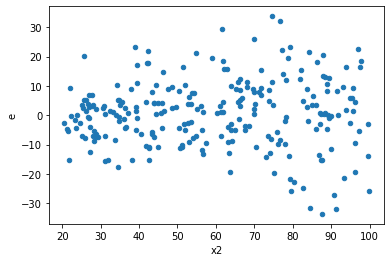

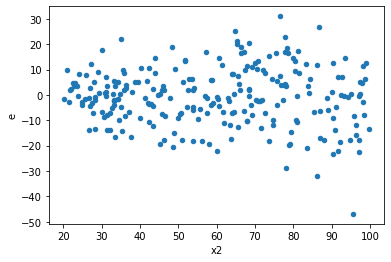

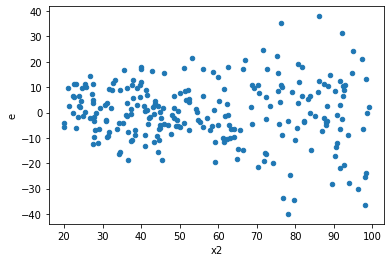

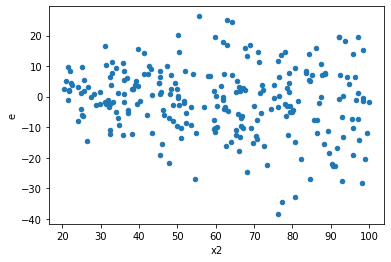

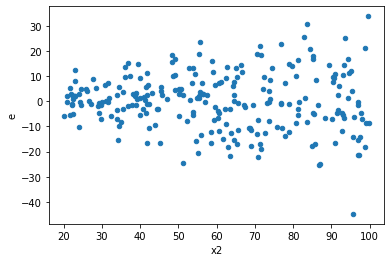

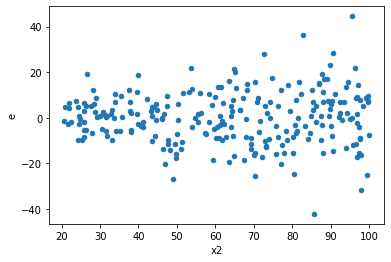

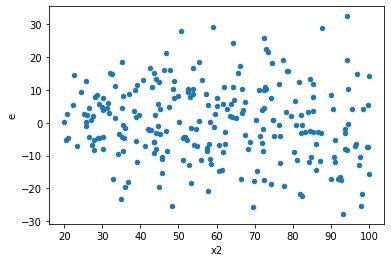

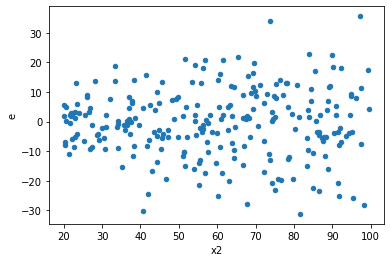

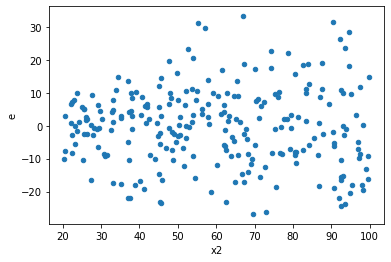

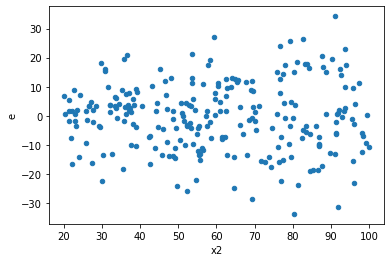

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,119.0,123.0,14702.487706759415,16949.36149083096,123.5503168635245,137.7996869173249,1.1153325253672999,0.5484709734059929,0.7257645132970035,0.27423548670299647,Reject005=1 : Homoscedasticity
6.0,106.0,136.0,12288.92852425496,19159.50399122161,115.93328796466943,140.87870581780595,1.2151704509643393,0.2835324289417158,0.8582337855291421,0.1417662144708579,Reject005=1 : Homoscedasticity
7.0,127.0,115.0,14418.075800402425,17503.833942081787,113.5281559086805,152.2072516702764,1.3407004672277818,0.11014857783735676,0.9449257110813216,0.05507428891867838,Reject005=1 : Homoscedasticity
9.0,125.0,117.0,16460.66143564156,15569.1446583704,131.68529148513247,133.06961246470428,1.0105123432082626,0.9558552752712468,0.5220723623643766,0.4779276376356234,Reject005=1 : Homoscedasticity
10.0,115.0,127.0,14530.780881106022,19322.583102452463,126.35461635744367,152.14632364135798,1.2041216065343614,0.30673014415688815,0.8466349279215559,0.15336507207844408,Reject005=1 : Homoscedasticity
11.0,122.0,120.0,14296.155426192601,20909.669449152876,117.18160185403771,174.2472454096073,1.486984668691003,0.030097110599942356,0.9849514447000288,0.015048555299971178,Reject005=0 : Heteroscedasticity
14.0,135.0,107.0,14836.998762878164,19334.978572362448,109.90369453983826,180.70073432114438,1.6441734290892593,0.007700515933556362,0.9961497420332218,0.003850257966778181,Reject005=0 : Heteroscedasticity
23.0,130.0,112.0,12418.626085001726,13964.36184460694,95.52789296155174,124.68180218399053,1.305187399393104,0.14806412792079282,0.9259679360396036,0.07403206396039641,Reject005=1 : Homoscedasticity
24.0,105.0,137.0,15862.940892683066,22897.93377844717,151.07562754936254,167.13820276238812,1.106321419765589,0.5762284951165508,0.7118857524417246,0.2881142475582754,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,123.0,14702.487706759415,16949.36149083096,123.5503168635245,137.7996869173249,1.1153325253672999,0.5484709734059929,Reject005=1 : Homoscedasticity
1.0,126.0,116.0,17779.880404608917,13099.873762093986,141.1101619413406,112.92994622494815,0.8002963406128968,0.22065039108979506,Reject005=1 : Homoscedasticity
2.0,134.0,108.0,23475.735498250902,12154.120600929728,175.19205595709627,112.5381537123123,0.6423701868072852,0.01505468012155871,Reject005=0 : Heteroscedasticity
3.0,125.0,117.0,16576.413720510245,10975.253177654002,132.61130976408197,93.80558271499147,0.7073724170425085,0.05743016990736715,Reject005=1 : Homoscedasticity
4.0,115.0,127.0,16100.332462521557,14130.885589077556,140.00289097844833,111.266815662028,0.7947465576204145,0.2103503873987891,Reject005=1 : Homoscedasticity
5.0,110.0,132.0,16096.313755262267,15275.916767261151,146.33012504783878,115.72664217622084,0.7908599964524534,0.20373849898341492,Reject005=1 : Homoscedasticity
6.0,106.0,136.0,12288.92852425496,19159.50399122161,115.93328796466943,140.87870581780595,1.2151704509643393,0.2835324289417158,Reject005=1 : Homoscedasticity
7.0,127.0,115.0,14418.075800402425,17503.833942081787,113.5281559086805,152.2072516702764,1.3407004672277818,0.11014857783735676,Reject005=1 : Homoscedasticity
8.0,124.0,118.0,19691.37341975102,13774.102478265082,158.8013985463792,116.72968201919561,0.7350670906409164,0.09118471378006161,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      640
Reject005=0 : Heteroscedasticity    360
Name: Result_test, dtype: int64